In [165]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

import pandas as pd

from utils.analysys_utils import list_experiments_in_dir

In [166]:
experiments_path = os.path.join(os.getcwd(), "runs", "momentum_exps", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)


In [167]:


data = {
    "m": [],
    "a": [],
    "val_loss": []
}

for exp in experiments:
    try: # avoid NaNs
        data['val_loss'].append(exp['final']['best_epoch']['val_loss'])    
        data['m'].append(exp['settings']['m'])
        data['a'].append(exp['settings']['a'])
    except:
        print(exp['uuid'])
    

df = pd.DataFrame(data)
df

2af1f43c-ab47-4d35-909c-bb461955641a
42277738-95d2-48ff-ab51-d1bedefb7b3f
47e903b0-5474-4ff3-98d8-a0aa2c1e6c32
4d954c72-4e88-4aa1-a3e7-a51b3ba5eb88
6ebf58d8-5c1b-45bc-81fe-e6379e034a12
800a8fa3-673b-4387-9024-bf83019c1e22
83ca4097-9c23-42ac-b6b7-091de788ee85
84eae729-47a1-4e84-8f7e-7c1e981143ee
99445ce4-3dae-46b7-84ef-cb6592a2ee91
dd9ae4ba-ddc9-437f-b0b6-3dbf874b55e6
e267bc20-c0a7-4372-863d-5bce28e7a809
f8a1bb04-696f-4525-9622-5db90a77660a


,m,a,val_loss
0,0.5,0.04,5.031903e+04
1,0.4,-0.16,1.660606e+05
2,0.2,-0.08,1.698236e+05
3,0.0,0.20,3.075023e+07
4,0.5,0.16,3.886523e+04
5,0.3,-0.08,1.684568e+05
6,0.4,-0.08,1.672684e+05
7,0.1,0.12,4.404711e+04
8,0.2,-0.12,1.696792e+05
9,0.2,0.00,1.931573e+04


In [168]:
# group by m and a with average
df_by_m_a = df.groupby(['m','a']).mean()
df_by_m_a

val_loss
m   a                  
0.0 -0.16  1.700080e+05
    -0.12  1.700129e+05
    -0.08  1.526314e+05
     0.00  2.932072e+06
     0.04  1.051458e+07
     0.08  2.107475e+07
     0.12  2.659396e+07
     0.16  2.941272e+07
     0.20  3.075023e+07
0.1 -0.16  1.698517e+05
    -0.12  1.698604e+05
    -0.08  1.699499e+05
     0.00  2.471315e+04
     0.04  4.092226e+04
     0.08  4.188758e+04
     0.12  4.404711e+04
     0.16  4.557330e+04
     0.20  4.680872e+04
0.2 -0.16  1.697232e+05
    -0.12  1.696792e+05
    -0.08  1.698236e+05
     0.00  1.644001e+04
     0.04  4.566664e+04
     0.08  4.770494e+04
     0.12  4.287320e+04
     0.16  4.642576e+04
     0.20  4.912053e+04
0.3 -0.16  1.684392e+05
    -0.12  1.678115e+05
    -0.08  1.684568e+05
     0.00  3.342466e+04
     0.04  3.690117e+04
     0.08  4.674781e+04
     0.12  4.634890e+04
     0.16  4.519617e+04
     0.20  5.191038e+04
0.4 -0.16  1.660606e+05
    -0.12  1.654371e+05
    -0.08  1.672684e+05
     0.00  2.457835e+04
     0.04  4.855986e+04
     0.08  3.519576e+04
     0.12  2.613307e+04
     0.16  4.648622e+04
     0.20  4.997777e+04
0.5 -0.16  1.675780e+05
    -0.12  1.671376e+05
    -0.08  1.655971e+05
     0.00  1.862200e+04
     0.04  5.031903e+04
     0.08  2.019552e+04
     0.12  2.506786e+04
     0.16  3.886523e+04
     0.20  5.404793e+04

In [169]:
# group by a and m with average
df_by_a_m = df.groupby(['a','m']).mean()
df_by_a_m

val_loss
a     m                
-0.16 0.0  1.700080e+05
      0.1  1.698517e+05
      0.2  1.697232e+05
      0.3  1.684392e+05
      0.4  1.660606e+05
      0.5  1.675780e+05
-0.12 0.0  1.700129e+05
      0.1  1.698604e+05
      0.2  1.696792e+05
      0.3  1.678115e+05
      0.4  1.654371e+05
      0.5  1.671376e+05
-0.08 0.0  1.526314e+05
      0.1  1.699499e+05
      0.2  1.698236e+05
      0.3  1.684568e+05
      0.4  1.672684e+05
      0.5  1.655971e+05
 0.00 0.0  2.932072e+06
      0.1  2.471315e+04
      0.2  1.644001e+04
      0.3  3.342466e+04
      0.4  2.457835e+04
      0.5  1.862200e+04
 0.04 0.0  1.051458e+07
      0.1  4.092226e+04
      0.2  4.566664e+04
      0.3  3.690117e+04
      0.4  4.855986e+04
      0.5  5.031903e+04
 0.08 0.0  2.107475e+07
      0.1  4.188758e+04
      0.2  4.770494e+04
      0.3  4.674781e+04
      0.4  3.519576e+04
      0.5  2.019552e+04
 0.12 0.0  2.659396e+07
      0.1  4.404711e+04
      0.2  4.287320e+04
      0.3  4.634890e+04
      0.4  2.613307e+04
      0.5  2.506786e+04
 0.16 0.0  2.941272e+07
      0.1  4.557330e+04
      0.2  4.642576e+04
      0.3  4.519617e+04
      0.4  4.648622e+04
      0.5  3.886523e+04
 0.20 0.0  3.075023e+07
      0.1  4.680872e+04
      0.2  4.912053e+04
      0.3  5.191038e+04
      0.4  4.997777e+04
      0.5  5.404793e+04

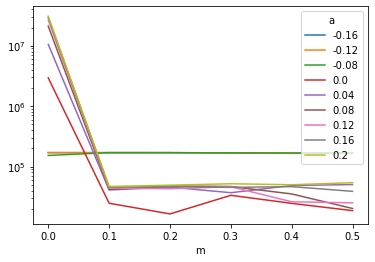

In [170]:
df_by_m_a.unstack()['val_loss'].plot(logy=True)

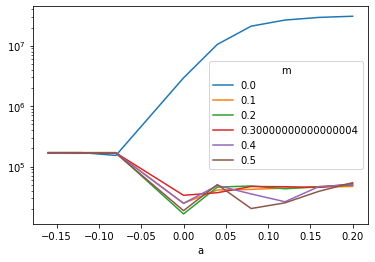

In [171]:
df_by_a_m.unstack()['val_loss'].plot(logy=True)